In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f_d(b, c, q, depth):
    #return b*(c**(0.01*depth*7/q))
    return b*(c**(0.01*depth))

def f_s(b, c, q, size):
    #return b*(c**(0.01*size*7/q))
    return b*(c**(0.01*size))

In [3]:
def SSE_empty(n):
    if(n==1):
        return [0,0,0]
    SSE = []
    for i in range(3):
        SSE.append(SSE_empty(n-1))
    return SSE.copy()

def optimize_noise_model_bcd(R):
    """
    A simple search algorithm to find the optimal parameters of the noise model.
    It returns  probaility of a good measurement b 
    and the deterioration base for the depth cd.
    Finally, it returns the best sum of remaining squared errors.
    """
    cd = 1.0
    b = 1.0
    eps = 0.0001
    SSE_best = 0
    for [q,p,a,R2_avg,R2_std,add,ads,ctr] in R:
        SSE_best += ctr*( ( f_d(b, cd, 7, add) - a )**2)
    cont = 1
    while( cont == 1 ):
        cont = 0
        b_p = [b-eps,b,b+eps].copy()
        cd_p = [cd-eps,cd,cd+eps].copy()
        #SSE[b_p][cd_p]
        SSE = SSE_empty(2)
        for [q,p,a,R2_avg,R2_std,add,ads,ctr] in R:
            for ib in range(3):
                for icd in range(3):
                    SSE[ib][icd] += ctr*( ( f_d(b_p[ib], cd_p[icd], 7, add) - a )**2)
        for ib in range(3):
            if( (b_p[ib]>=0) & (b_p[ib]<=1) ):
                for icd in range(3):
                    if( (cd_p[icd]>=0) & (cd_p[icd]<=1) ):
                        if( SSE[ib][icd] < SSE_best ):
                            cont = 1
                            SSE_best = SSE[ib][icd]
                            b  =  b_p[ib]
                            cd = cd_p[icd]
    return b,cd, SSE_best

def optimize_noise_model_bcs(R):
    """
    A simple search algorithm to find the optimal parameters of the noise model.
    It returns  probaility of a good measurement b 
    and the deterioration base for the size cs of the circuit.
    Finally, it returns the best sum of remaining squared errors.
    """
    cs = 1.0
    b = 1.0
    eps = 0.0001
    SSE_best = 0
    for [q,p,a,R2_avg,R2_std,add,ads,ctr] in R:
        SSE_best += ctr*( ( f_s(b, cs, 7, ads) - a )**2)
    cont = 1
    while( cont == 1 ):
        cont = 0
        b_p = [b-eps,b,b+eps].copy()
        cs_p = [cs-eps,cs,cs+eps].copy()
        #SSE[b_p][cd_p]
        SSE = SSE_empty(2)
        for [q,p,a,R2_avg,R2_std,add,ads,ctr] in R:
            for ib in range(3):
                for ics in range(3):
                    SSE[ib][ics] += ctr*( ( f_s(b_p[ib], cs_p[ics], 7, ads) - a )**2)
        for ib in range(3):
            if( (b_p[ib]>=0) & (b_p[ib]<=1) ):
                for ics in range(3):
                    if( (cs_p[ics]>=0) & (cs_p[ics]<=1) ):
                        if( SSE[ib][ics] < SSE_best ):
                            cont = 1
                            SSE_best = SSE[ib][ics]
                            b  =  b_p[ib]
                            cs = cs_p[ics]
    return b,cs, SSE_best

In [4]:
def optimize_noise_model_multiqubit_bcd(R_dic):
    """
    This is an extension of optimize_noise_model_bcd.
    Instead of results for a single number of qubits, 
    it analyzes the fits the noise model for a variety of qubit numbers.
    As input it takes a dictionary of result lists. (R=R_dic[k])
    """
    cd = 1.0
    b = 1.0
    eps = 0.0001
    SSE_best = 0
    for k in R_dic.keys():
        for [q,p,a,R2_avg,R2_std,add,ads,ctr] in R_dic[k]:
            SSE_best += ctr*( ( f_d(b, cd, q, add) - a )**2)
    cont = 1
    while( cont == 1 ):
        cont = 0
        b_p = [b-eps,b,b+eps].copy()
        cd_p = [cd-eps,cd,cd+eps].copy()
        SSE = SSE_empty(2)
        for k in R_dic.keys():
            for [q,p,a,R2_avg,R2_std,add,ads,ctr] in R_dic[k]:
                for ib in range(3):
                    for icd in range(3):
                        SSE[ib][icd] += ctr*( ( f_d(b_p[ib], cd_p[icd], q, add) - a )**2)
        for ib in range(3):
            if( (b_p[ib]>=0) & (b_p[ib]<=1) ):
                for icd in range(3):
                    if( (cd_p[icd]>=0) & (cd_p[icd]<=1) ):
                        if( SSE[ib][icd] < SSE_best ):
                            cont = 1
                            SSE_best = SSE[ib][icd]
                            b  =  b_p[ib]
                            cd = cd_p[icd]
    return b,cd, SSE_best

def optimize_noise_model_multiqubit_bcs(R_dic):
    """
    This is an extension of optimize_noise_model_bcs.
    Instead of results for a single number of qubits, 
    it analyzes the fits the noise model for a variety of qubit numbers.
    As input it takes a dictionary of result lists. (R=R_dic[k])
    """
    cs = 1.0
    b = 1.0
    eps = 0.0001
    SSE_best = 0
    for k in R_dic.keys():
        for [q,p,a,R2_avg,R2_std,add,ads,ctr] in R_dic[k]:
            SSE_best += ctr*( ( f_s(b, cs, q, ads) - a )**2)
    cont = 1
    while( cont == 1 ):
        cont = 0
        b_p = [b-eps,b,b+eps].copy()
        cs_p = [cs-eps,cs,cs+eps].copy()
        SSE = SSE_empty(2)
        for k in R_dic.keys():
            for [q,p,a,R2_avg,R2_std,add,ads,ctr] in R_dic[k]:
                for ib in range(3):
                    for ics in range(3):
                        SSE[ib][ics] += ctr*( ( f_s(b_p[ib], cs_p[ics], q, ads) - a )**2)
        for ib in range(3):
            if( (b_p[ib]>=0) & (b_p[ib]<=1) ):
                for ics in range(3):
                    if( (cs_p[ics]>=0) & (cs_p[ics]<=1) ):
                        if( SSE[ib][ics] < SSE_best ):
                            cont = 1
                            SSE_best = SSE[ib][ics]
                            b  =  b_p[ib]
                            cs = cs_p[ics]
    return b,cs, SSE_best

## Thermal noise model

In [5]:
D = {}
#with open('to_more_qubits_simulation_results/to_more_qubits_thermal_noise_13032023.txt', 'r') as f:
#with open('to_more_qubits_simulation_results/to_more_qubits_thermal_noise_20032023.txt', 'r') as f:
#with open('to_more_qubits_simulation_results/to_more_qubits_thermal_noise_27032023.txt', 'r') as f:
#with open('to_more_qubits_simulation_results/to_more_qubits_thermal_noise_11042023.txt', 'r') as f:
#with open('to_more_qubits_simulation_results/to_more_qubits_thermal_noise_24052023.txt', 'r') as f:
#with open('to_more_qubits_simulation_results/to_more_qubits_thermal_noise_25052023.txt', 'r') as f:
#with open('to_more_qubits_simulation_results/to_more_qubits_thermal_noise_26052023.txt', 'r') as f:
with open('to_more_qubits_simulation_results/to_more_qubits_thermal_noise_28092023.txt', 'r') as f:
#with open('to_more_qubits_simulation_results/to_more_qubits_thermal_noise_29092023.txt', 'r') as f:
    q = None
    for line in f:
        lst = line.strip().split(' ')
        #print(len(lst), lst)
        if(len(lst)==1):
            q = None
        elif( (len(lst)==2) & (lst[1]=='qubits')):
            q = lst[0]
            D[q] = {}
        elif( (len(lst)==3) & (lst[0]=='Time') ):
            D[q]['time_req'] = lst[2]
        elif( (len(lst)==4) & (lst[3]=='bcd') ):
            D[q]['b'] = float(lst[0])
            D[q]['c'] = float(lst[1])
            D[q]['sse'] = float(lst[2])
        elif( (len(lst)==11) & (q==lst[0]) ):
            D[q][lst[1]] = {}
            D[q][lst[1]]['val_att'] = int(lst[2])
            D[q][lst[1]]['a_depth'] = float(lst[3])
            D[q][lst[1]]['a_size'] = float(lst[4])
            D[q][lst[1]]['a'] = float(lst[8])
            D[q][lst[1]]['a_R2'] = float(lst[9])
            D[q][lst[1]]['a_std'] = float(lst[10])

## Size

In [6]:
R = {}
x = []
y_b = []
y_c = []
y_b2 = []
y_c2 = []
y_c3 = []
y_sse = []

print(D.keys())

for k in D.keys():
    R[k] = []
    for l in D[k].keys():
        if(l in ['0', '1', '2', '3', '4', '5', '6', '7']):
            R[k].append( [ int(k), int(l), D[k][l]['a'], D[k][l]['a_R2'], D[k][l]['a_std'], D[k][l]['a_depth'], D[k][l]['a_size'], D[k][l]['val_att'] ].copy() )

mqb, mqcd, sse = optimize_noise_model_multiqubit_bcd(R)
print(mqb, mqcd, sse)

for k in D.keys():            
    for l in R[k]:
        print(l)
    b_t, c_t, sse_t = optimize_noise_model_bcd(R[k])
    print("b", round(b_t,4), round(mqb,4), D[k]['b'])  
    print("c", round(c_t,4), round(f_d(1.0, D['7']['c'], int(k), 100.0),4), round(f_d(1.0, mqcd, int(k), 100.0),4), D[k]['c'])
    print("sse", round(sse_t,3), round(D[k]['sse'],3) )
    x.append(int(k))
    y_b.append(D[k]['b'])
    y_b2.append(0.99)
    y_c.append(D[k]['c'])
    y_c2.append(f_d(1.0, D['7']['c'], int(k), 100.0))
    y_c3.append(f_d(1.0, mqcd, int(k), 100.0))
    y_sse.append(D[k]['sse'])
    print()

dict_keys(['4', '5', '6', '7', '8', '9', '10', '11', '12'])
0.9958000000000005 0.4118000000000648 3.629933958209907
[4, 0, 0.98, 1.0, 0.0, 1.0, 1.0, 10]
[4, 1, 0.887, 0.8, 0.4, 19.7, 27.2, 10]
[4, 2, 0.498, 1.0, 0.0, 73.6, 99.3, 10]
[4, 3, 0.556, 0.9, 0.3, 84.0, 116.5, 10]
[4, 4, 0.419, 0.9, 0.3, 125.6, 170.8, 10]
[4, 5, 0.245, 0.9, 0.3, 156.9, 214.1, 10]
[4, 6, 0.218, 0.8, 0.4, 234.9, 316.0, 10]
[4, 7, 0.205, 0.5, 0.5, 197.3, 265.1, 10]
b 0.9972 0.9958 0.9974
c 0.4634 0.4423 0.4118 0.4636
sse 0.143 0.143

[5, 0, 0.98, 1.0, 0.0, 1.0, 1.0, 10]
[5, 1, 0.742, 0.7, 0.458, 50.7, 66.0, 10]
[5, 2, 0.48, 0.9, 0.3, 98.6, 130.9, 10]
[5, 3, 0.248, 0.9, 0.3, 159.2, 218.1, 10]
[5, 4, 0.027, 0.83, 0.347, 215.4, 295.7, 10]
[5, 5, 0.073, 0.805, 0.39, 209.0, 288.4, 10]
[5, 6, 0.114, 0.8, 0.4, 272.9, 374.5, 10]
[5, 7, 0.152, 0.7, 0.458, 320.2, 440.7, 10]
b 1.0 0.9958 1.0
c 0.4218 0.4423 0.4118 0.4218
sse 0.455 0.454

[6, 0, 0.98, 1.0, 0.0, 1.0, 1.0, 10]
[6, 1, 0.511, 1.0, 0.0, 52.7, 70.8, 10]
[6, 2, 0.0

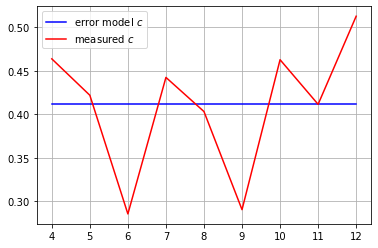

In [7]:
# make graph
fig, ax = plt.subplots()
#ax.plot(x,y_b, color='pink')
#ax.plot(x,y_b2, color='cyan')
#ax.plot(x,y_c2, color='orange')
ax.plot(x,y_c3, color='blue')
ax.plot(x,y_c, color='red')
#ax.plot(x,y_sse, color='yellow')
plt.grid()
plt.legend(['error model $c$', 'measured $c$'])
name = 'dummy_more_qubits_thermal_depth.png'
#plt.savefig(name)
plt.show()

## Size

In [8]:
R = {}
x = []
y_b = []
y_c = []
y_b2 = []
y_c2 = []
y_c3 = []
y_sse = []

print(D.keys())

for k in D.keys():
    R[k] = []
    for l in D[k].keys():
        if(l in ['0', '1', '2', '3', '4', '5', '6', '7']):
            R[k].append( [ int(k), int(l), D[k][l]['a'], D[k][l]['a_R2'], D[k][l]['a_std'], D[k][l]['a_depth'], D[k][l]['a_size'], D[k][l]['val_att'] ].copy() )

mqb, mqcs, sse = optimize_noise_model_multiqubit_bcs(R)
print(mqb, mqcs, sse)

for k in D.keys():            
    for l in R[k]:
        print(l)
    b_t, c_t, sse_t = optimize_noise_model_bcs(R[k])
    print("b", round(b_t,4), round(mqb,4), D[k]['b'])  
    print("c", round(c_t,4), round(f_s(1.0, D['7']['c'], int(k), 100.0),4), 
          round(f_s(1.0, mqcs, int(k), 100.0),4), D[k]['c'])
    print("sse", round(sse_t,3), round(D[k]['sse'],3) )
    x.append(int(k))
    y_b.append(D[k]['b'])
    y_b2.append(0.99)
    y_c2.append(f_s(1.0, D['7']['c'], int(k), 100.0))
    #y_c.append(c_t)
    #y_c3.append(f_s(1.0, mqcs, int(k), 100.0))
    y_c.append(D[k]['c'])
    y_c3.append( sum( D[k]['c'] for k in D.keys() ) / len(D.keys()) )
    y_sse.append(D[k]['sse'])
    print()

dict_keys(['4', '5', '6', '7', '8', '9', '10', '11', '12'])
0.9915000000000009 0.5272000000000521 3.5054108334723217
[4, 0, 0.98, 1.0, 0.0, 1.0, 1.0, 10]
[4, 1, 0.887, 0.8, 0.4, 19.7, 27.2, 10]
[4, 2, 0.498, 1.0, 0.0, 73.6, 99.3, 10]
[4, 3, 0.556, 0.9, 0.3, 84.0, 116.5, 10]
[4, 4, 0.419, 0.9, 0.3, 125.6, 170.8, 10]
[4, 5, 0.245, 0.9, 0.3, 156.9, 214.1, 10]
[4, 6, 0.218, 0.8, 0.4, 234.9, 316.0, 10]
[4, 7, 0.205, 0.5, 0.5, 197.3, 265.1, 10]
b 0.9973 0.9915 0.9974
c 0.5681 0.4423 0.5272 0.4636
sse 0.149 0.143

[5, 0, 0.98, 1.0, 0.0, 1.0, 1.0, 10]
[5, 1, 0.742, 0.7, 0.458, 50.7, 66.0, 10]
[5, 2, 0.48, 0.9, 0.3, 98.6, 130.9, 10]
[5, 3, 0.248, 0.9, 0.3, 159.2, 218.1, 10]
[5, 4, 0.027, 0.83, 0.347, 215.4, 295.7, 10]
[5, 5, 0.073, 0.805, 0.39, 209.0, 288.4, 10]
[5, 6, 0.114, 0.8, 0.4, 272.9, 374.5, 10]
[5, 7, 0.152, 0.7, 0.458, 320.2, 440.7, 10]
b 1.0 0.9915 1.0
c 0.5282 0.4423 0.5272 0.4218
sse 0.415 0.454

[6, 0, 0.98, 1.0, 0.0, 1.0, 1.0, 10]
[6, 1, 0.511, 1.0, 0.0, 52.7, 70.8, 10]
[6, 2, 0.

[0.4636, 0.4218, 0.2856, 0.4423, 0.4031, 0.2905, 0.4626, 0.4114, 0.5125]


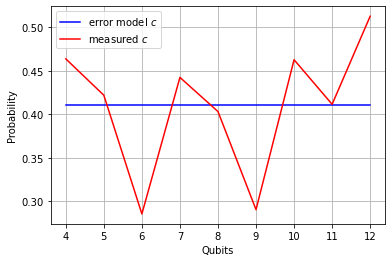

In [9]:
print(y_c)
# make graph
fig, ax = plt.subplots()
#ax.plot(x,y_b, color='pink')
#ax.plot(x,y_b2, color='cyan')
#ax.plot(x,y_c2, color='orange')
ax.plot(x,y_c3, color='blue')
ax.plot(x,y_c, color='red')
#ax.plot(x,y_sse, color='yellow')
plt.grid()
plt.legend(['error model $c$', 'measured $c$'])
ax.set_xlabel('Qubits')
ax.set_ylabel('Probability')
name = 'dummy_more_qubits_thermal_size.png'
plt.savefig(name)
plt.show()

## Future noise model

In [25]:
D = {}
#with open('to_more_qubits_simulation_results/to_more_qubits_future_noise_13032023.txt', 'r') as f:
#with open('to_more_qubits_simulation_results/to_more_qubits_future_noise_20032023.txt', 'r') as f:
#with open('to_more_qubits_simulation_results/to_more_qubits_future_noise_27032023.txt', 'r') as f:
#with open('to_more_qubits_simulation_results/to_more_qubits_future_noise_11042023.txt', 'r') as f:
#with open('to_more_qubits_simulation_results/to_more_qubits_future_noise_24052023.txt', 'r') as f:
#with open('to_more_qubits_simulation_results/to_more_qubits_future_noise_25052023.txt', 'r') as f:
with open('to_more_qubits_simulation_results/to_more_qubits_future_noise_26052023.txt', 'r') as f:
#with open('to_more_qubits_simulation_results/to_more_qubits_future_noise_27052023.txt', 'r') as f:
    q = None
    for line in f:
        lst = line.strip().split(' ')
        #print(len(lst), lst)
        if(len(lst)==1):
            q = None
        elif( (len(lst)==2) & (lst[1]=='qubits')):
            q = lst[0]
            D[q] = {}
        elif( (len(lst)==3) & (lst[0]=='Time') ):
            D[q]['time_req'] = lst[2]
        elif( (len(lst)==4) & (lst[3]=='bcd') ):
            D[q]['b'] = float(lst[0])
            D[q]['c'] = float(lst[1])
            D[q]['sse'] = float(lst[2])
        elif( (len(lst)==11) & (q==lst[0]) ):
            D[q][lst[1]] = {}
            D[q][lst[1]]['val_att'] = int(lst[2])
            D[q][lst[1]]['a_depth'] = float(lst[3])
            D[q][lst[1]]['a_size'] = float(lst[4])
            D[q][lst[1]]['a'] = float(lst[8])
            D[q][lst[1]]['a_R2'] = float(lst[9])
            D[q][lst[1]]['a_std'] = float(lst[10])

## Depth

In [26]:
R = {}
x = []
y_b = []
y_c = []
y_b2 = []
y_c2 = []
y_c3 = []
y_sse = []
for k in D.keys():
    R[k] = []
    for l in D[k].keys():
        if(l in ['0', '1', '2', '3', '4', '5', '6', '7']):
            R[k].append( [ int(k), int(l), D[k][l]['a'], D[k][l]['a_R2'], D[k][l]['a_std'], D[k][l]['a_depth'], D[k][l]['a_size'], D[k][l]['val_att'] ].copy() )

mqb, mqcd, sse = optimize_noise_model_multiqubit_bcd(R)
print(mqb, mqcd, sse)

for k in D.keys():
    for l in R[k]:
        print(l)
    b_t, c_t, sse_t = optimize_noise_model_bcd(R[k])
    print("b", round(b_t,4), round(mqb,4), D[k]['b'])  
    print("c", round(c_t,4), round(f_d(1.0, D['7']['c'], int(k), 100.0),4), round(f_d(1.0, mqcd, int(k), 100.0),4), D[k]['c'])
    print("sse", round(sse_t,3), round(D[k]['sse'],3) )
    x.append(int(k))
    y_b.append(D[k]['b'])
    y_b2.append(0.99)
    y_c.append(D[k]['c'])
    y_c2.append(f_d(1.0, D['7']['c'], int(k), 100.0))
    y_c3.append(f_d(1.0, mqcd, int(k), 100.0))
    y_sse.append(D[k]['sse'])
    print()

0.9793000000000023 0.5061000000000544 76.37148708630066
[4, 0, 0.99, 0.998, 0.05, 1.0, 1.0, 400]
[4, 1, 0.825, 0.761, 0.424, 19.59, 28.0, 400]
[4, 2, 0.731, 0.81, 0.392, 38.83, 56.02, 400]
[4, 3, 0.628, 0.831, 0.371, 56.02, 80.97, 400]
[4, 4, 0.563, 0.801, 0.399, 76.0, 109.91, 400]
[4, 5, 0.476, 0.836, 0.367, 92.62, 134.49, 400]
[4, 6, 0.419, 0.792, 0.405, 111.42, 161.51, 400]
[4, 7, 0.38, 0.821, 0.382, 124.59, 181.68, 400]
b 0.9827 0.9793 0.9825
c 0.4632 0.4909 0.5061 0.4634
sse 0.412 0.414

[5, 0, 0.99, 0.993, 0.086, 1.0, 1.0, 400]
[5, 1, 0.787, 0.798, 0.4, 29.08, 40.84, 400]
[5, 2, 0.638, 0.833, 0.371, 56.2, 79.53, 400]
[5, 3, 0.519, 0.789, 0.406, 85.18, 120.28, 400]
[5, 4, 0.442, 0.806, 0.395, 113.07, 160.84, 400]
[5, 5, 0.345, 0.809, 0.392, 140.28, 200.28, 400]
[5, 6, 0.268, 0.751, 0.432, 171.39, 243.76, 400]
[5, 7, 0.226, 0.761, 0.425, 197.66, 281.49, 400]
b 0.989 0.9793 0.9891
c 0.4722 0.4909 0.5061 0.4724
sse 0.255 0.257

[6, 0, 0.99, 0.99, 0.099, 1.0, 1.0, 400]
[6, 1, 0.687, 0

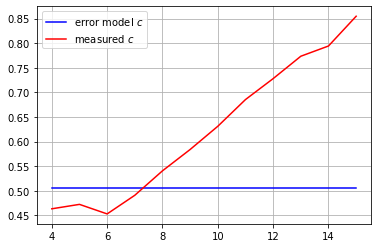

In [27]:
# make graph
fig, ax = plt.subplots()
#ax.plot(x,y_b, color='pink')
#ax.plot(x,y_b2, color='cyan')
#ax.plot(x,y_c2, color='orange')
ax.plot(x,y_c3, color='blue')
ax.plot(x,y_c, color='red')
#ax.plot(x,y_sse, color='yellow')
plt.grid()
plt.legend(['error model $c$', 'measured $c$'])
#name = 'dummy_more_qubits_future_depth.png'
plt.savefig(name)
plt.show()

## Size

In [28]:
R = {}
x = []
y_b = []
y_c = []
y_b2 = []
y_c2 = []
y_c3 = []
y_sse = []
for k in D.keys():
    R[k] = []
    for l in D[k].keys():
        if(l in ['0', '1', '2', '3', '4', '5', '6', '7']):
            R[k].append( [ int(k), int(l), D[k][l]['a'], D[k][l]['a_R2'], D[k][l]['a_std'], D[k][l]['a_depth'], D[k][l]['a_size'], D[k][l]['val_att'] ].copy() )

mqb, mqcs, sse = optimize_noise_model_multiqubit_bcs(R)
print(mqb, mqcs, sse)

for k in D.keys():
    for l in R[k]:
        print(l)
    b_t, c_t, sse_t = optimize_noise_model_bcs(R[k])
    print("b", round(b_t,4), round(mqb,4), D[k]['b'])  
    print("c", round(c_t,4), round(f_s(1.0, D['7']['c'], int(k), 100.0),4), round(f_s(1.0, mqcs, int(k), 100.0),4), D[k]['c'])
    print("sse", round(sse_t,3), round(D[k]['sse'],3) )
    x.append(int(k))
    y_b.append(D[k]['b'])
    y_b2.append(0.99)
    y_c.append(D[k]['c'])
    y_c2.append(f_s(1.0, D['7']['c'], int(k), 100.0))
    y_c3.append(f_s(1.0, mqcs, int(k), 100.0))
    y_sse.append(D[k]['sse'])
    print()

0.9798000000000022 0.6141000000000425 65.92001300347412
[4, 0, 0.99, 0.998, 0.05, 1.0, 1.0, 400]
[4, 1, 0.825, 0.761, 0.424, 19.59, 28.0, 400]
[4, 2, 0.731, 0.81, 0.392, 38.83, 56.02, 400]
[4, 3, 0.628, 0.831, 0.371, 56.02, 80.97, 400]
[4, 4, 0.563, 0.801, 0.399, 76.0, 109.91, 400]
[4, 5, 0.476, 0.836, 0.367, 92.62, 134.49, 400]
[4, 6, 0.419, 0.792, 0.405, 111.42, 161.51, 400]
[4, 7, 0.38, 0.821, 0.382, 124.59, 181.68, 400]
b 0.98 0.9798 0.9825
c 0.5896 0.4909 0.6141 0.4634
sse 0.413 0.414

[5, 0, 0.99, 0.993, 0.086, 1.0, 1.0, 400]
[5, 1, 0.787, 0.798, 0.4, 29.08, 40.84, 400]
[5, 2, 0.638, 0.833, 0.371, 56.2, 79.53, 400]
[5, 3, 0.519, 0.789, 0.406, 85.18, 120.28, 400]
[5, 4, 0.442, 0.806, 0.395, 113.07, 160.84, 400]
[5, 5, 0.345, 0.809, 0.392, 140.28, 200.28, 400]
[5, 6, 0.268, 0.751, 0.432, 171.39, 243.76, 400]
[5, 7, 0.226, 0.761, 0.425, 197.66, 281.49, 400]
b 0.9861 0.9798 0.9891
c 0.5909 0.4909 0.6141 0.4724
sse 0.275 0.257

[6, 0, 0.99, 0.99, 0.099, 1.0, 1.0, 400]
[6, 1, 0.687, 0.

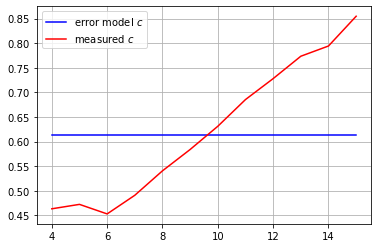

In [29]:
# make graph
fig, ax = plt.subplots()
#ax.plot(x,y_b, color='pink')
#ax.plot(x,y_b2, color='cyan')
#ax.plot(x,y_c2, color='orange')
ax.plot(x,y_c3, color='blue')
ax.plot(x,y_c, color='red')
#ax.plot(x,y_sse, color='yellow')
plt.grid()
plt.legend(['error model $c$', 'measured $c$'])
name = 'dummy_more_qubits_future_size.png'
#plt.savefig(name)
plt.show()